In [1]:
%matplotlib inline 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd 

sns.set_theme()


#### Make a DataFrame from the OGLE catalog of variable stars

In [2]:
# First grab data for LMC 
ogle4_dir = '/Users/jill/Research/Surveys/OGLE/OGLEIV/LMC/'

# get identification data 
col_names = ['id', 'ra', 'dec']
cep_coords = pd.read_table(ogle4_dir+'ccep/ident.dat.txt', sep='\s+', names=col_names, usecols=(0,2,3))
rrl_coords = pd.read_table(ogle4_dir+'rrl/ident.dat.txt', sep='\s+', names=col_names, usecols=(0,2,3))
ac_coords = pd.read_table(ogle4_dir+'acep/ident.dat.txt', sep='\s+', names=col_names, usecols=(0,2,3))
t2c_coords = pd.read_table(ogle4_dir+'t2cep/ident.dat.txt', sep='\s+', names=col_names, usecols=(0,2,3))

# get parameter data 
col_names = ['id', 'Imag', 'Vmag', 'period', 'e_period', 't0', 'Iamp', 'R21', 'phi21', 'R31', 'phi31']
cep_fo = pd.read_table(ogle4_dir+'ccep/cep1O.dat.txt', sep='\s+', names=col_names)
cep_fu = pd.read_table(ogle4_dir+'ccep/cepF.dat.txt', sep='\s+', names=col_names)
rrl_fo = pd.read_table(ogle4_dir+'rrl/rrc.dat.txt', sep='\s+', names=col_names)
rrl_fu = pd.read_table(ogle4_dir+'rrl/rrab.dat.txt', sep='\s+', names=col_names)
ac_fo = pd.read_table(ogle4_dir+'acep/acep1O.dat.txt', sep='\s+', names=col_names)
ac_fu = pd.read_table(ogle4_dir+'acep/acepF.dat.txt', sep='\s+', names=col_names)
t2c = pd.read_table(ogle4_dir+'t2cep/t2cep.dat.txt', sep='\s+', names=col_names)

# Join parameter data with identification data 
cep_fo = cep_fo.set_index('id').join(cep_coords.set_index('id')).reset_index()
cep_fu = cep_fu.set_index('id').join(cep_coords.set_index('id')).reset_index()
rrl_fo = rrl_fo.set_index('id').join(rrl_coords.set_index('id')).reset_index()
rrl_fu = rrl_fu.set_index('id').join(rrl_coords.set_index('id')).reset_index()
ac_fo = ac_fo.set_index('id').join(ac_coords.set_index('id')).reset_index()
ac_fu = ac_fu.set_index('id').join(ac_coords.set_index('id')).reset_index()
t2c = t2c.set_index('id').join(t2c_coords.set_index('id')).reset_index()

# Define variable type and galaxy for master table 
cep_fo['var_type'] = np.repeat('CEP FO', len(cep_fo.index))
cep_fu['var_type'] = np.repeat('CEP FU', len(cep_fu.index))
rrl_fo['var_type'] = np.repeat('RRL FO', len(rrl_fo.index))
rrl_fu['var_type'] = np.repeat('RRL FU', len(rrl_fu.index))
ac_fo['var_type'] = np.repeat('AC FO', len(ac_fo.index))
ac_fu['var_type'] = np.repeat('AC FU', len(ac_fu.index))
t2c['var_type'] = np.repeat('T2C', len(t2c.index))

lmc_vars = cep_fo.append(cep_fu, ignore_index=True)
lmc_vars = lmc_vars.append(rrl_fo, ignore_index=True)
lmc_vars = lmc_vars.append(rrl_fu, ignore_index=True)
lmc_vars = lmc_vars.append(ac_fo, ignore_index=True)
lmc_vars = lmc_vars.append(ac_fu, ignore_index=True)
lmc_vars = lmc_vars.append(t2c, ignore_index=True)

lmc_vars['galaxy'] = 'LMC'

# Repeat for SMC 

ogle4_dir = '/Users/jill/Research/Surveys/OGLE/OGLEIV/SMC/'

# get identification data 
col_names = ['id', 'ra', 'dec']
cep_coords = pd.read_table(ogle4_dir+'ccep/ident.dat.txt', sep='\s+', names=col_names, usecols=(0,2,3))
rrl_coords = pd.read_table(ogle4_dir+'rrl/ident.dat.txt', sep='\s+', names=col_names, usecols=(0,2,3))
ac_coords = pd.read_table(ogle4_dir+'acep/ident.dat.txt', sep='\s+', names=col_names, usecols=(0,2,3))
t2c_coords = pd.read_table(ogle4_dir+'t2cep/ident.dat.txt', sep='\s+', names=col_names, usecols=(0,2,3))

# get parameter data 
col_names = ['id', 'Imag', 'Vmag', 'period', 'e_period', 't0', 'Iamp', 'R21', 'phi21', 'R31', 'phi31']
cep_fo = pd.read_table(ogle4_dir+'ccep/cep1O.dat.txt', sep='\s+', names=col_names)
cep_fu = pd.read_table(ogle4_dir+'ccep/cepF.dat.txt', sep='\s+', names=col_names)
rrl_fo = pd.read_table(ogle4_dir+'rrl/rrc.dat.txt', sep='\s+', names=col_names)
rrl_fu = pd.read_table(ogle4_dir+'rrl/rrab.dat.txt', sep='\s+', names=col_names)
ac_fo = pd.read_table(ogle4_dir+'acep/acep1O.dat.txt', sep='\s+', names=col_names)
ac_fu = pd.read_table(ogle4_dir+'acep/acepF.dat.txt', sep='\s+', names=col_names)
t2c = pd.read_table(ogle4_dir+'t2cep/t2cep.dat.txt', sep='\s+', names=col_names)

# Join parameter data with identification data 
cep_fo = cep_fo.set_index('id').join(cep_coords.set_index('id')).reset_index()
cep_fu = cep_fu.set_index('id').join(cep_coords.set_index('id')).reset_index()
rrl_fo = rrl_fo.set_index('id').join(rrl_coords.set_index('id')).reset_index()
rrl_fu = rrl_fu.set_index('id').join(rrl_coords.set_index('id')).reset_index()
ac_fo = ac_fo.set_index('id').join(ac_coords.set_index('id')).reset_index()
ac_fu = ac_fu.set_index('id').join(ac_coords.set_index('id')).reset_index()
t2c = t2c.set_index('id').join(t2c_coords.set_index('id')).reset_index()

# Define variable type and galaxy for master table 
cep_fo['var_type'] = np.repeat('CEP FO', len(cep_fo.index))
cep_fu['var_type'] = np.repeat('CEP FU', len(cep_fu.index))
rrl_fo['var_type'] = np.repeat('RRL FO', len(rrl_fo.index))
rrl_fu['var_type'] = np.repeat('RRL FU', len(rrl_fu.index))
ac_fo['var_type'] = np.repeat('AC FO', len(ac_fo.index))
ac_fu['var_type'] = np.repeat('AC FU', len(ac_fu.index))
t2c['var_type'] = np.repeat('T2C', len(t2c.index))

smc_vars = cep_fo.append(cep_fu, ignore_index=True)
smc_vars = smc_vars.append(rrl_fo, ignore_index=True)
smc_vars = smc_vars.append(rrl_fu, ignore_index=True)
smc_vars = smc_vars.append(ac_fo, ignore_index=True)
smc_vars = smc_vars.append(ac_fu, ignore_index=True)
smc_vars = smc_vars.append(t2c, ignore_index=True)

smc_vars['galaxy'] = 'SMC'

lmc_vars['M_I'] = lmc_vars['Imag'] - 18.477 
smc_vars['M_I'] = smc_vars['Imag'] - 18.477 - 0.48

In [3]:
lmc_vars 

,id,Imag,Vmag,period,e_period,t0,Iamp,R21,phi21,R31,phi31,ra,dec,var_type,galaxy,M_I
0,OGLE-LMC-CEP-0001,17.755,18.154,0.306818,4.000000e-07,6000.12792,0.359,0.292,4.676,0.071,2.928,04:30:57.72,-69:03:37.4,CEP FO,LMC,-0.722
1,OGLE-LMC-CEP-0003,17.846,18.384,0.350096,5.000000e-07,6000.23531,0.322,0.178,4.887,0.088,2.828,04:35:05.70,-70:25:26.9,CEP FO,LMC,-0.631
2,OGLE-LMC-CEP-0004,15.123,15.690,2.229638,6.500000e-06,6000.63293,0.245,0.146,4.676,0.000,NaN,04:35:20.16,-69:48:07.7,CEP FO,LMC,-3.354
3,OGLE-LMC-CEP-0006,14.707,15.366,3.294750,2.130000e-05,6000.96197,0.211,0.105,3.443,0.063,0.285,04:35:42.16,-69:43:29.1,CEP FO,LMC,-3.770
4,OGLE-LMC-CEP-0007,16.955,17.561,0.709083,1.900000e-06,6000.23537,0.191,0.174,3.336,0.137,1.076,04:36:30.06,-68:37:35.7,CEP FO,LMC,-1.522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42530,OGLE-LMC-T2CEP-287,18.089,18.701,1.344327,3.900000e-06,7000.38164,0.409,0.177,5.304,0.130,0.334,06:20:41.99,-72:31:36.2,T2C,LMC,-0.388
42531,OGLE-LMC-T2CEP-288,18.052,18.500,1.071366,2.100000e-06,7000.77229,0.622,0.321,4.716,0.095,2.696,06:31:50.38,-68:00:19.6,T2C,LMC,-0.425
42532,OGLE-LMC-T2CEP-289,17.224,18.033,3.013458,4.570000e-05,7000.95400,0.511,0.241,5.534,0.139,4.140,06:39:15.59,-75:18:24.8,T2C,LMC,-1.253
42533,OGLE-LMC-T2CEP-290,17.869,18.520,0.932120,2.000000e-06,7000.64764,0.238,0.264,4.016,0.110,1.559,04:51:11.61,-69:00:33.0,T2C,LMC,-0.608


In [4]:
smc_vars

,id,Imag,Vmag,period,e_period,t0,Iamp,R21,phi21,R31,phi31,ra,dec,var_type,galaxy,M_I
0,OGLE-SMC-CEP-0002,16.690,17.230,1.135453,0.000002,6000.03660,0.279,0.213,4.644,0.072,2.850,00:20:41.37,-74:30:58.4,CEP FO,SMC,-2.267
1,OGLE-SMC-CEP-0003,16.997,17.437,0.956296,0.000001,6000.56383,0.466,0.344,4.449,0.115,2.345,00:21:04.59,-73:46:15.3,CEP FO,SMC,-1.960
2,OGLE-SMC-CEP-0012,16.204,16.880,1.774286,0.000016,6001.34337,0.149,0.153,4.583,0.000,NaN,00:22:30.66,-73:25:27.9,CEP FO,SMC,-2.753
3,OGLE-SMC-CEP-0020,17.308,17.887,0.875255,0.000002,6000.48702,0.299,0.285,4.336,0.060,2.260,00:23:15.49,-73:13:58.2,CEP FO,SMC,-1.649
4,OGLE-SMC-CEP-0021,16.913,17.380,1.091679,0.000002,6000.52844,0.441,0.236,4.603,0.088,3.035,00:23:20.96,-73:36:10.2,CEP FO,SMC,-2.044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10619,OGLE-SMC-T2CEP-50,17.464,18.348,4.227618,0.000037,7001.52773,0.299,0.224,5.577,0.055,5.263,01:01:44.24,-75:01:02.1,T2C,SMC,-1.493
10620,OGLE-SMC-T2CEP-51,18.708,19.343,1.065770,0.000004,7000.11577,0.288,0.250,5.268,0.000,NaN,01:06:10.27,-71:04:46.0,T2C,SMC,-0.249
10621,OGLE-SMC-T2CEP-52,18.147,18.784,1.746251,0.000003,7000.80591,0.444,0.165,5.389,0.156,2.602,01:09:40.00,-70:28:39.8,T2C,SMC,-0.810
10622,OGLE-SMC-T2CEP-53,16.307,17.277,14.912622,0.000549,7013.31086,0.631,0.071,2.067,0.057,2.617,01:12:50.53,-74:35:18.4,T2C,SMC,-2.650


In [5]:
all_vars = lmc_vars.append(smc_vars)
all_vars 


,id,Imag,Vmag,period,e_period,t0,Iamp,R21,phi21,R31,phi31,ra,dec,var_type,galaxy,M_I
0,OGLE-LMC-CEP-0001,17.755,18.154,0.306818,4.000000e-07,6000.12792,0.359,0.292,4.676,0.071,2.928,04:30:57.72,-69:03:37.4,CEP FO,LMC,-0.722
1,OGLE-LMC-CEP-0003,17.846,18.384,0.350096,5.000000e-07,6000.23531,0.322,0.178,4.887,0.088,2.828,04:35:05.70,-70:25:26.9,CEP FO,LMC,-0.631
2,OGLE-LMC-CEP-0004,15.123,15.690,2.229638,6.500000e-06,6000.63293,0.245,0.146,4.676,0.000,NaN,04:35:20.16,-69:48:07.7,CEP FO,LMC,-3.354
3,OGLE-LMC-CEP-0006,14.707,15.366,3.294750,2.130000e-05,6000.96197,0.211,0.105,3.443,0.063,0.285,04:35:42.16,-69:43:29.1,CEP FO,LMC,-3.770
4,OGLE-LMC-CEP-0007,16.955,17.561,0.709083,1.900000e-06,6000.23537,0.191,0.174,3.336,0.137,1.076,04:36:30.06,-68:37:35.7,CEP FO,LMC,-1.522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10619,OGLE-SMC-T2CEP-50,17.464,18.348,4.227618,3.680000e-05,7001.52773,0.299,0.224,5.577,0.055,5.263,01:01:44.24,-75:01:02.1,T2C,SMC,-1.493
10620,OGLE-SMC-T2CEP-51,18.708,19.343,1.065770,3.600000e-06,7000.11577,0.288,0.250,5.268,0.000,NaN,01:06:10.27,-71:04:46.0,T2C,SMC,-0.249
10621,OGLE-SMC-T2CEP-52,18.147,18.784,1.746251,2.500000e-06,7000.80591,0.444,0.165,5.389,0.156,2.602,01:09:40.00,-70:28:39.8,T2C,SMC,-0.810
10622,OGLE-SMC-T2CEP-53,16.307,17.277,14.912622,5.493000e-04,7013.31086,0.631,0.071,2.067,0.057,2.617,01:12:50.53,-74:35:18.4,T2C,SMC,-2.650


In [6]:
all_vars['logP'] = np.log10(all_vars['period'])
def hms_to_deg(x): 
    temp = x.split(':')
    xx = float(temp[0]) + float(temp[1])/60 + float(temp[2])/3600
    return 15*(xx)

def dms_to_deg(x): 
    temp = x.split(':')
    if float(temp[0]) > 0:
        xx = float(temp[0]) + float(temp[1])/60 + float(temp[2])/3600
    else:
        xx = float(temp[0]) - float(temp[1])/60 - float(temp[2])/3600
    return xx
    
all_vars['ra_deg'] = all_vars['ra'].apply(hms_to_deg)
all_vars['dec_deg'] = all_vars['dec'].apply(dms_to_deg)

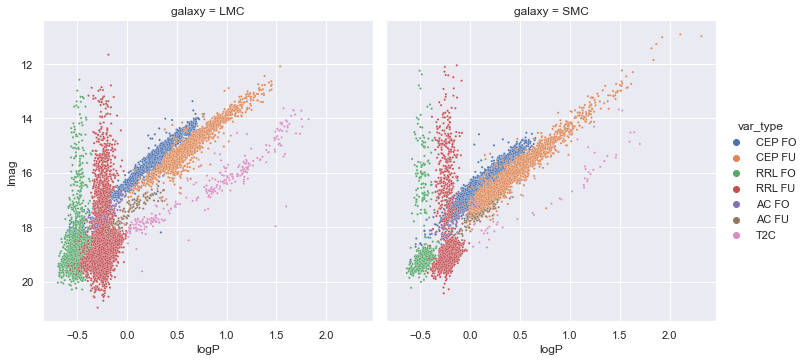

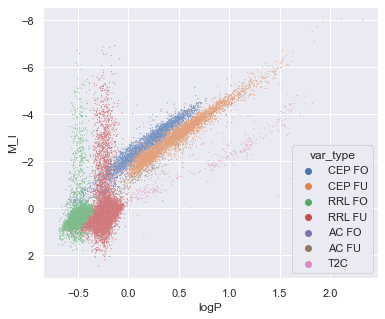

In [13]:
fig = sns.relplot(data=all_vars, x='logP', y='Imag', col='galaxy', hue='var_type',
    kind='scatter', s=5)
ax = fig.axes
ax[0,0].invert_yaxis()

fig2, ax2 = plt.subplots(1,1, figsize=(6,5))
sns.scatterplot(data=all_vars, x='logP', y='M_I', hue='var_type', s=1, ax=ax2)
ax2.invert_yaxis()

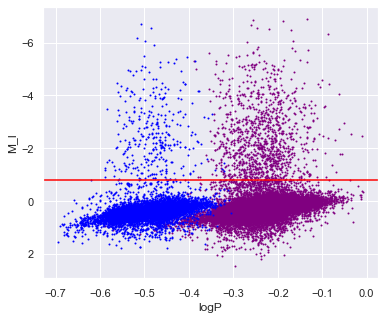

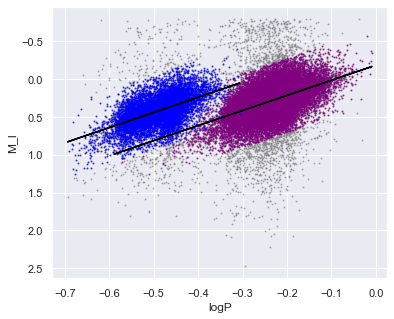

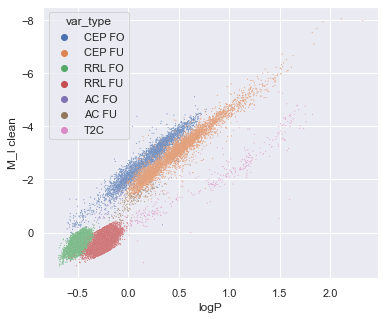

In [88]:
# Need to clean RRL stars of foreground sources 

rrab = all_vars['var_type'] == 'RRL FU'
rrc = all_vars['var_type'] == 'RRL FO'

fig, ax = plt.subplots(1,1, figsize=(6,5))
ax.scatter(all_vars['logP'][rrab], all_vars['M_I'][rrab], s=1, color='purple')
ax.scatter(all_vars['logP'][rrc], all_vars['M_I'][rrc], s=1, color='blue')
ax.axhline(-0.8, color='red')
ax.invert_yaxis()
ax.set_xlabel('logP')
ax.set_ylabel('M_I')

# First cut everything brighter than M_I = -0.8 
keep_ab = (all_vars['M_I'] > -0.8) & rrab 
keep_c = (all_vars['M_I'] > -0.8) & rrc


# Do linear regression and sigma clipping to cut further outliers 
import statsmodels.api as sm 
from astropy.stats import sigma_clip

X = sm.add_constant(all_vars['logP'][keep_ab])
lmodel = sm.OLS(all_vars['M_I'][keep_ab], X)
results_ab = lmodel.fit()

X = sm.add_constant(all_vars['logP'][keep_c])
lmodel = sm.OLS(all_vars['M_I'][keep_c], X)
results_c = lmodel.fit()


residuals_ab = all_vars['M_I'][keep_ab] - results_ab.predict()
residuals_c = all_vars['M_I'][keep_c] - results_c.predict()

clipped_ab = sigma_clip(residuals_ab)
clipped_c = sigma_clip(residuals_c)

final_ab = ~clipped_ab.mask 
final_c = ~clipped_c.mask 

fig, ax = plt.subplots(1,1, figsize=(6,5))
ax.scatter(all_vars['logP'][keep_ab], all_vars['M_I'][keep_ab], s=1, color='gray', alpha=0.5)
ax.scatter(all_vars['logP'][keep_c], all_vars['M_I'][keep_c], s=1, color='gray', alpha=0.5)
ax.scatter(all_vars['logP'][keep_ab][final_ab], all_vars['M_I'][keep_ab][final_ab], s=1, color='purple', alpha=0.5)
ax.scatter(all_vars['logP'][keep_c][final_c], all_vars['M_I'][keep_c][final_c], s=1, color='blue', alpha=0.5)

ax.plot(all_vars['logP'][keep_ab], results_ab.predict(), color='black')
ax.plot(all_vars['logP'][keep_c], results_c.predict(), color='black')

ax.invert_yaxis()
ax.set_xlabel('logP')
ax.set_ylabel('M_I')

# apply filter to data table 
s1 = np.array(keep_ab)
s2 = np.array(final_ab)
s3 = np.copy(s1)
s3[s1] = s2

s1 = np.array(keep_c)
s2 = np.array(final_c)
s4 = np.copy(s1)
s4[s1] = s2

all_vars['M_I clean'] = np.where((s3 == 1) | (s4 == 1) | 
                                (all_vars['var_type'].isin(['CEP FO', 'CEP FU', 'AC FO', 'AC FU', 'T2C'])), 
                                                           all_vars['M_I'], np.nan)

fig2, ax2 = plt.subplots(1,1, figsize=(6,5))
sns.scatterplot(data=all_vars, x='logP', y='M_I clean', hue='var_type', s=1, ax=ax2)
ax2.invert_yaxis()

,Imag,Vmag,Iamp,R21,phi21,R31,phi31,var_type,logP,ra_deg,dec_deg,M_I clean
id,,,,,,,,,,,,
OGLE-LMC-CEP-0001,17.755,18.154,0.359,0.292,4.676,0.071,2.928,CEP FO,-0.513119,67.740500,-69.060389,-0.722
OGLE-LMC-CEP-0003,17.846,18.384,0.322,0.178,4.887,0.088,2.828,CEP FO,-0.455813,68.773750,-70.424139,-0.631
OGLE-LMC-CEP-0006,14.707,15.366,0.211,0.105,3.443,0.063,0.285,CEP FO,0.517822,68.925667,-69.724750,-3.770
OGLE-LMC-CEP-0007,16.955,17.561,0.191,0.174,3.336,0.137,1.076,CEP FO,-0.149303,69.125250,-68.626583,-1.522
OGLE-LMC-CEP-0009,15.433,16.130,0.195,0.175,4.864,0.035,2.907,CEP FO,0.306289,69.217208,-68.064250,-3.044
...,...,...,...,...,...,...,...,...,...,...,...,...
OGLE-SMC-T2CEP-49,15.973,16.826,0.885,0.167,0.008,0.070,3.776,T2C,1.189218,12.953750,-75.199500,-2.984
OGLE-SMC-T2CEP-50,17.464,18.348,0.299,0.224,5.577,0.055,5.263,T2C,0.626096,15.434333,-75.017250,-1.493
OGLE-SMC-T2CEP-52,18.147,18.784,0.444,0.165,5.389,0.156,2.602,T2C,0.242107,17.416667,-70.477722,-0.810


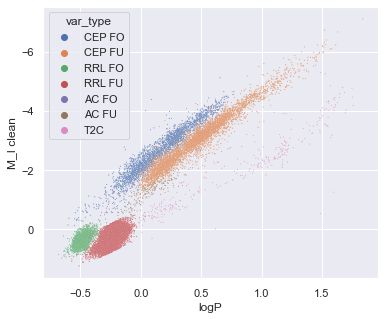

In [89]:
all_vars_clean = all_vars.drop(['period', 'e_period', 't0', 'ra', 'dec', 'galaxy', 'M_I'], axis=1).set_index('id')
all_vars_clean = all_vars_clean.dropna(axis=0)
display(all_vars_clean) 

fig2, ax2 = plt.subplots(1,1, figsize=(6,5))
sns.scatterplot(data=all_vars_clean, x='logP', y='M_I clean', hue='var_type', s=1, ax=ax2)
ax2.invert_yaxis()

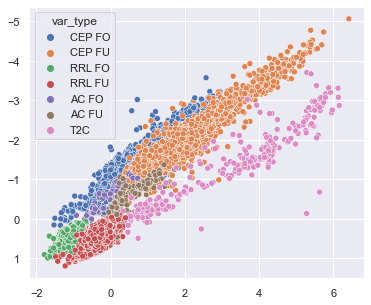

In [90]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(all_vars_clean.drop('var_type',axis=1))
scaled_features = scaler.transform(all_vars_clean.drop('var_type',axis=1))

fig, ax = plt.subplots(1,1, figsize=(6,5))
sns.scatterplot(x=scaled_features[:,7], y=scaled_features[:,-1], hue=all_vars_clean['var_type'], ax=ax)
ax.invert_yaxis()

In [91]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_features,all_vars_clean['var_type'],
                                                    test_size=0.30, random_state=42)

#### K Nearest Neighbors seems to work pretty well for most classes, but Anomalous Cepheids (the class with the fewest number of sources) is not well separated. 


In [92]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test, pred))

#print(y_test.unique())



[[   2    0   16    0    1    3    0]
 [   0   29    1   17    0   10    1]
 [   2    0  827    4    3    5    0]
 [   0    0   12 1460    0    0    1]
 [   0    0    0    0 1000    6    0]
 [   0    0    0    0    2 8294    0]
 [   0    1    3   13    0    4   59]]


              precision    recall  f1-score   support

       AC FO       0.50      0.09      0.15        22
       AC FU       0.97      0.50      0.66        58
      CEP FO       0.96      0.98      0.97       841
      CEP FU       0.98      0.99      0.98      1473
      RRL FO       0.99      0.99      0.99      1006
      RRL FU       1.00      1.00      1.00      8296
         T2C       0.97      0.74      0.84        80

    accuracy                           0.99     11776
   macro avg       0.91      0.76      0.80     11776
weighted avg       0.99      0.99      0.99     11776



Text(0.5, 1.0, 'Predicted Classification')

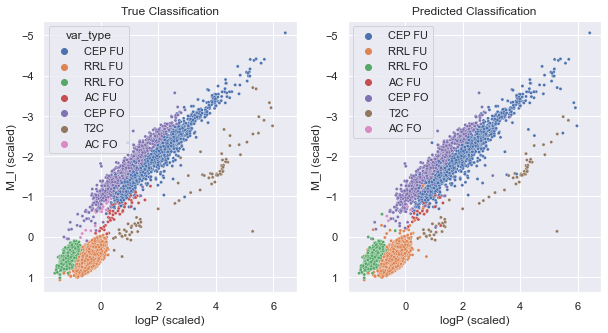

In [99]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
sns.scatterplot(x=X_test[:,7], y=X_test[:,-1], hue=y_test, ax=ax[0], s=10)
ax[0].invert_yaxis()
sns.scatterplot(x=X_test[:,7], y=X_test[:,-1], hue=pred, ax=ax[1], s=10)
ax[1].invert_yaxis()

ax[0].set_xlabel('logP (scaled)')
ax[0].set_ylabel('M_I (scaled)')
ax[1].set_xlabel('logP (scaled)')
ax[1].set_ylabel('M_I (scaled)')
ax[0].set_title('True Classification')
ax[1].set_title('Predicted Classification')

#### Linear SVC also works well for CEP/RRL, but is very poor at classifying AC. 

In [95]:
from sklearn.svm import LinearSVC
model = LinearSVC(max_iter=2000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test, y_pred))

/Users/jill/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[[   2    0   18    0    1    1    0]
 [   0    6    0   36    0   15    1]
 [   2    1  831    5    2    0    0]
 [   3    1    5 1461    0    0    3]
 [   1    0    1    0 1001    3    0]
 [   1    0    0    0    3 8292    0]
 [   0    1    0    3    0    6   70]]


              precision    recall  f1-score   support

       AC FO       0.22      0.09      0.13        22
       AC FU       0.67      0.10      0.18        58
      CEP FO       0.97      0.99      0.98       841
      CEP FU       0.97      0.99      0.98      1473
      RRL FO       0.99      1.00      0.99      1006
      RRL FU       1.00      1.00      1.00      8296
         T2C       0.95      0.88      0.91        80

    accuracy                           0.99     11776
   macro avg       0.82      0.72      0.74     11776
weighted avg       0.99      0.99      0.99     11776



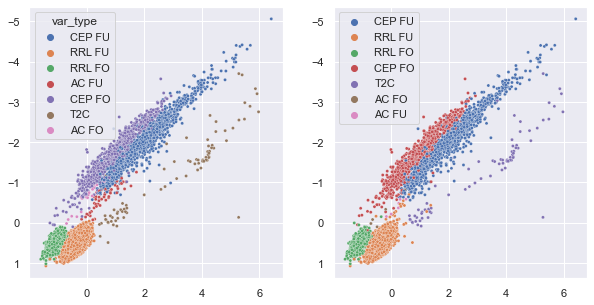

In [97]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
sns.scatterplot(x=X_test[:,7], y=X_test[:,-1], hue=y_test, ax=ax[0], s=10)
ax[0].invert_yaxis()
sns.scatterplot(x=X_test[:,7], y=X_test[:,-1], hue=y_pred, ax=ax[1], s=10)
ax[1].invert_yaxis()